<a href="https://colab.research.google.com/github/shwe-hg/capstone-project-on-ML-Regression-/blob/main/Project_on_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Bike Sharing Demand Prediction**

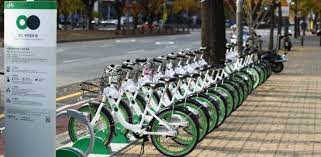

##Project Type : Regression 
##Contribution : Individual 

##Project summary :

###Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

##GitHub Link :                                       
###GitHub Link -

##About the dataset :

###We have the data which contains hour , temperature, humidity etc .

###**Dataset info** :

Number of columns - 14

Number of rows - 8760

##Dataset Description :

###1.**Date** : year-month-day
###2.**Rented Bike count** - Count of bikes rented at each hour
###3.**Hour** - Hour of he day
###4.**Temperature**-Temperature in Celsius
###5.**Humidity** - %
###6.**Windspeed** - m/s
###7.**Visibility** - 10m
###8.**Dew point temperature** - Celsius
###9.**Solar radiation** - MJ/m2
###10.**Rainfall** - mm
###11.**Snowfall** - cm
###12.**Seasons** - Winter, Spring, Summer, Autumn
###13.**Holiday** - Holiday/No holiday
###14.**Functional Day** - NoFunc(Non Functional Hours), Fun(Functional hours)

##Importing all libraries :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Library of warnings would assist in ignoring warnings issued
import warnings
warnings.filterwarnings('ignore')



import datetime as dt

In [2]:
# mounting the google drive to access the files 
from google.colab import drive 
drive.mount('/content/drive') 

Mounted at /content/drive


In [3]:
# loading dataset 
df=pd.read_csv("/content/SeoulBikeData.csv" ,encoding='unicode_escape')

In [4]:
# first 5 rows
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
#last 5 rows
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [6]:
# shape of dataset
df.shape

(8760, 14)

In [7]:
#info about columns 
df.columns 

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [8]:
# info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [9]:
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [10]:
# making a copy of dataset so that original dataset remain unchanged.
df1=df.copy()

In [11]:
# statistical info
df1.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [12]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


## **Preprocessing the dataset**

###Duplicate Values

In [13]:
d_value=df1[df1.duplicated()].shape
print("the no of duplicate values is",d_value)

the no of duplicate values is (0, 14)


We found that there is no duplicate values in the above dataset .

###Missing values / Null values

In [14]:
df1.isnull()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8756,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8757,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8758,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
df1.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

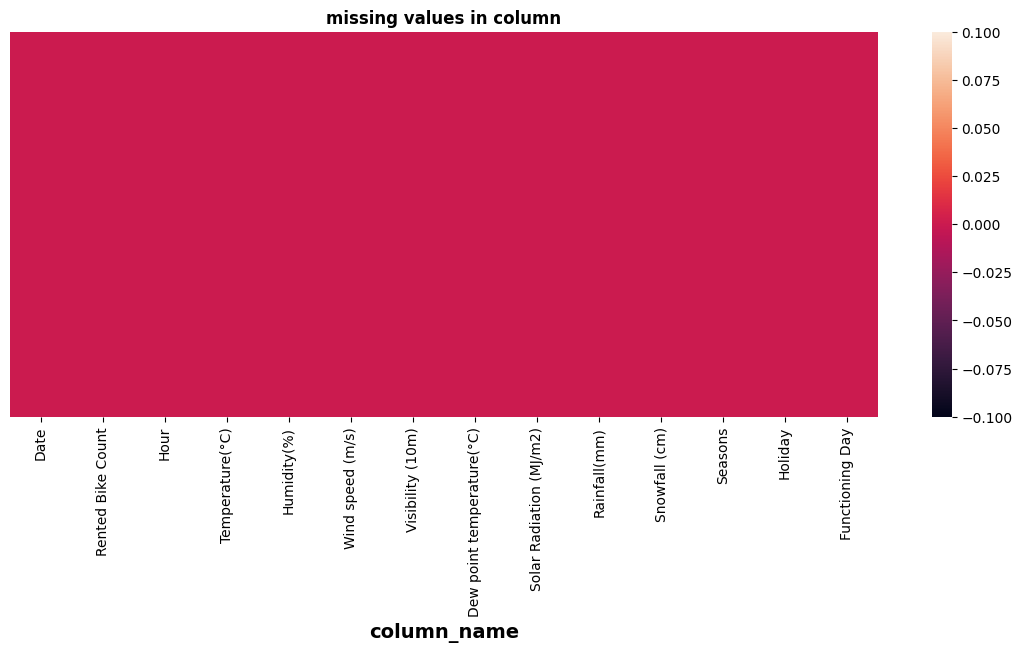

In [16]:
# heatmap for missing values .
plt.figure(figsize=(14, 5))
sns.heatmap(df1.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=14, weight="bold")
plt.title("missing values in column",fontweight="bold",size=12)
plt.show()


Getting the data type of dataset .

In [17]:
df1.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [18]:
df1['Date'].value_counts()

01/12/2017    24
09/08/2018    24
07/08/2018    24
06/08/2018    24
05/08/2018    24
              ..
31/03/2018    24
30/03/2018    24
29/03/2018    24
28/03/2018    24
30/11/2018    24
Name: Date, Length: 365, dtype: int64

**converting date column dtype object to date.**

In [19]:
df1['Date']= pd.to_datetime(df1['Date'])

In [20]:
df1['Date']=pd.to_datetime(df1['Date'])
df1['month'] = df1['Date'].apply(lambda x : x.month)
df1['day_of_week'] = df1['Date'].dt.day_name()
df1['weekdays_weekend']=df1['day_of_week'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
df1=df1.drop(columns=['Date','day_of_week'],axis=1)

**we converted the date column into 3 different column  i.e day , month , year**.


**the day column contain info of 365 days , for our relevance we converted day into weekdays and weekend . after that we dropped the column day_of_week** .

In [21]:
df1['weekdays_weekend'].value_counts()

0    6216
1    2544
Name: weekdays_weekend, dtype: int64

Text(0.5, 1.0, 'weekdays_and_weekend')

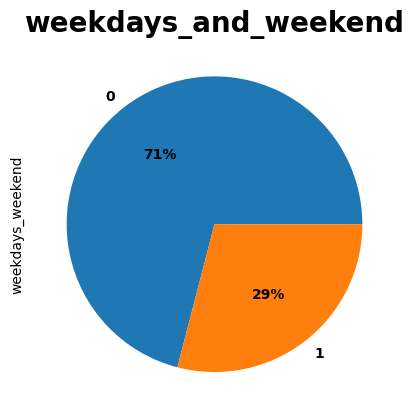

In [22]:
plt.subplot(1,1,1)
weekdays_and_weekend = df1.weekdays_weekend.value_counts()
weekdays_and_weekend.plot.pie(autopct='%1.0f%%',textprops={'weight': 'bold'})
plt.title('weekdays_and_weekend',fontweight="bold", size=20)

**The % of weekends is 29% where as weekdays is 71%.**

<Axes: >

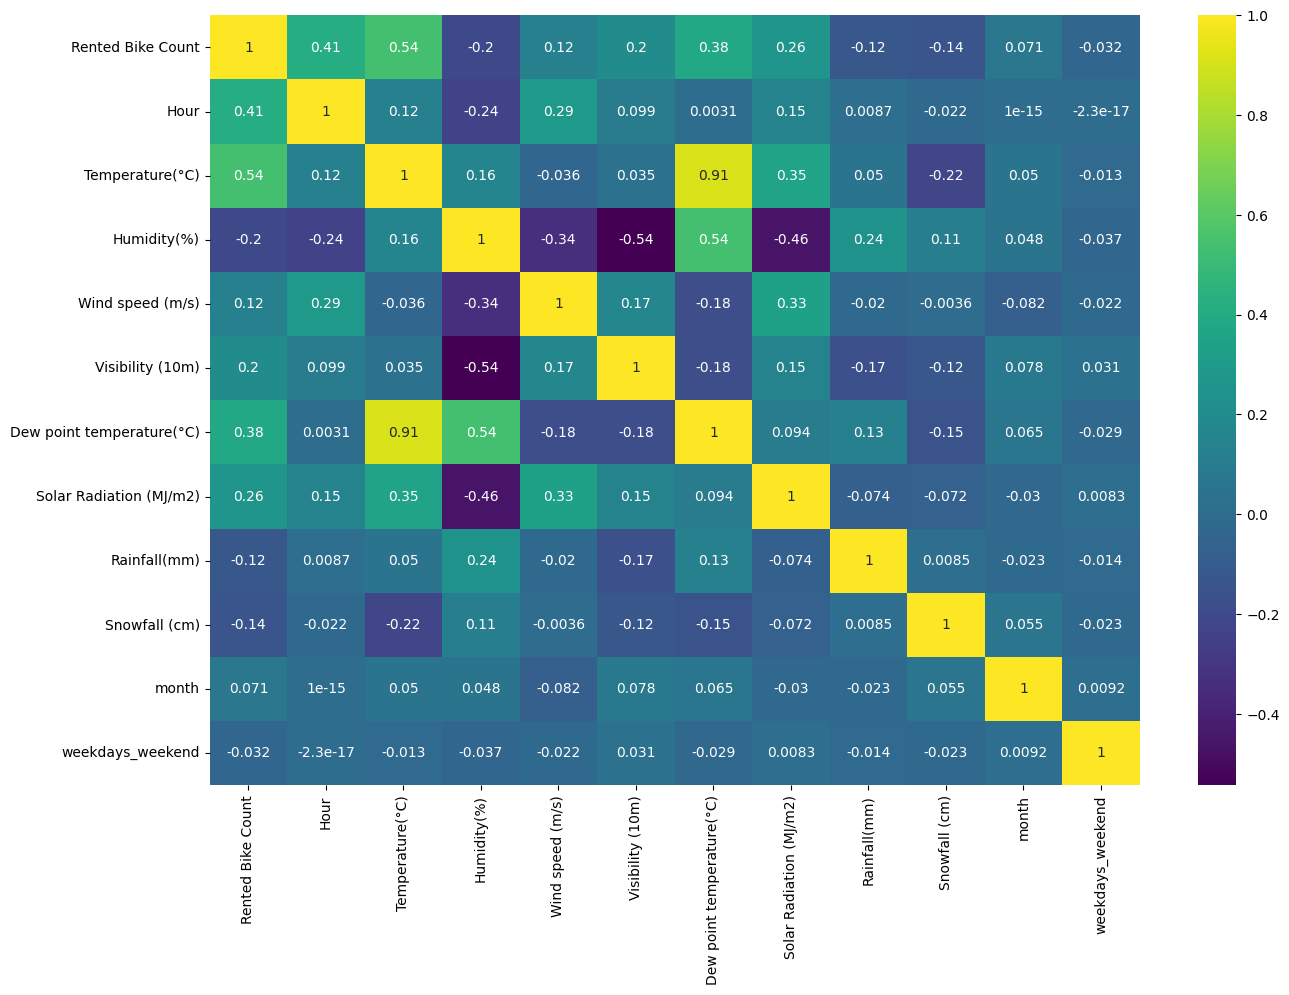

In [23]:
#checking correlation with the help of heatmap
corr_mat=df1.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_mat,cmap='viridis',annot=True)

In [24]:
df1.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0


In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  month                      8760 non-null   int64

In [26]:
df1.nunique()

Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
month                          12
weekdays_weekend                2
dtype: int64

**converting Hour, month , weekends_weekday columns from integer to Categorical.**

In [27]:
#Change the int64 column into catagory column
cols=['Hour','month','weekdays_weekend']
for col in cols:
  df1[col]=df1[col].astype('category')

In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Rented Bike Count          8760 non-null   int64   
 1   Hour                       8760 non-null   category
 2   Temperature(°C)            8760 non-null   float64 
 3   Humidity(%)                8760 non-null   int64   
 4   Wind speed (m/s)           8760 non-null   float64 
 5   Visibility (10m)           8760 non-null   int64   
 6   Dew point temperature(°C)  8760 non-null   float64 
 7   Solar Radiation (MJ/m2)    8760 non-null   float64 
 8   Rainfall(mm)               8760 non-null   float64 
 9   Snowfall (cm)              8760 non-null   float64 
 10  Seasons                    8760 non-null   object  
 11  Holiday                    8760 non-null   object  
 12  Functioning Day            8760 non-null   object  
 13  month                      8760 n

In [29]:
#Change the int64 column into catagory column
cols=['Holiday','Functioning Day','Seasons']
for col in cols:
  df1[col]=df1[col].astype('category')

In [30]:
df1['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

Text(0.5, 1.0, 'different seasons are')

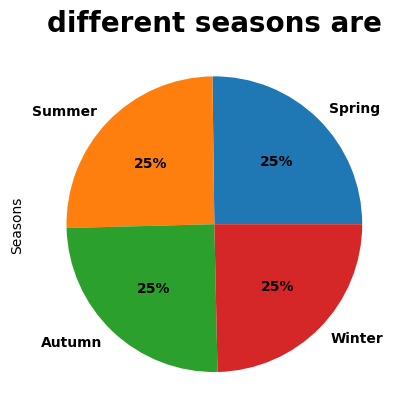

In [31]:
plt.subplot(1,1,1)
seasons = df1.Seasons.value_counts()
seasons.plot.pie(autopct='%1.0f%%',textprops={'weight': 'bold'})
plt.title('different seasons are',fontweight="bold", size=20)

**All seasons are distributed equally i.e 25% of summer, spring, autumn, winter.**

In [32]:
df1['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

Text(0.5, 1.0, 'functioning days are')

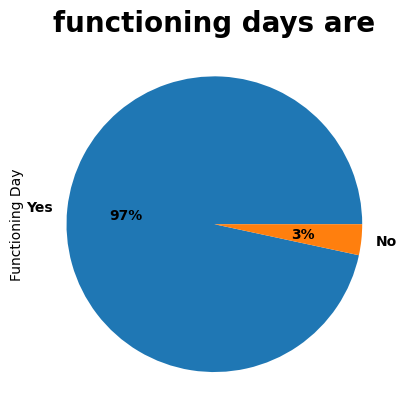

In [33]:
plt.subplot(1,1,1)
functioning_day = df1['Functioning Day'].value_counts()
functioning_day.plot.pie(autopct='%1.0f%%',textprops={'weight': 'bold'})
plt.title('functioning days are',fontweight="bold", size=20)

**The functioning day % is 97% where as non functioning day % is 3%.**

In [34]:
df1['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

Text(0.5, 1.0, 'holiday and non holiday are')

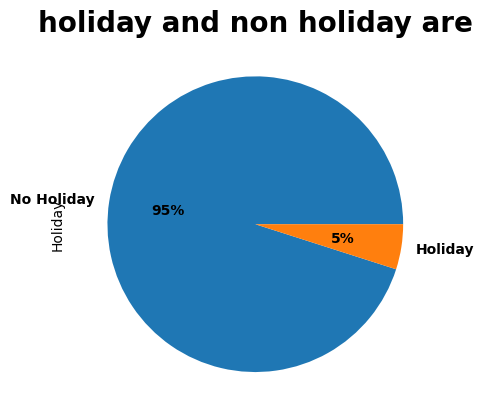

In [35]:
plt.subplot(1,1,1)
holiday = df1.Holiday.value_counts()
holiday.plot.pie(autopct='%1.0f%%',textprops={'weight': 'bold'})
plt.title('holiday and non holiday are',fontweight="bold", size=20)

**The hoilday % is 5% and the remaining is considered as no holiday.**

**Doing EDA on Categorcal data**.

In [36]:
category_columns=list(df1.select_dtypes(['category']).columns)
category_features=pd.Index(category_columns)
category_features

Index(['Hour', 'Seasons', 'Holiday', 'Functioning Day', 'month',
       'weekdays_weekend'],
      dtype='object')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Month ')]

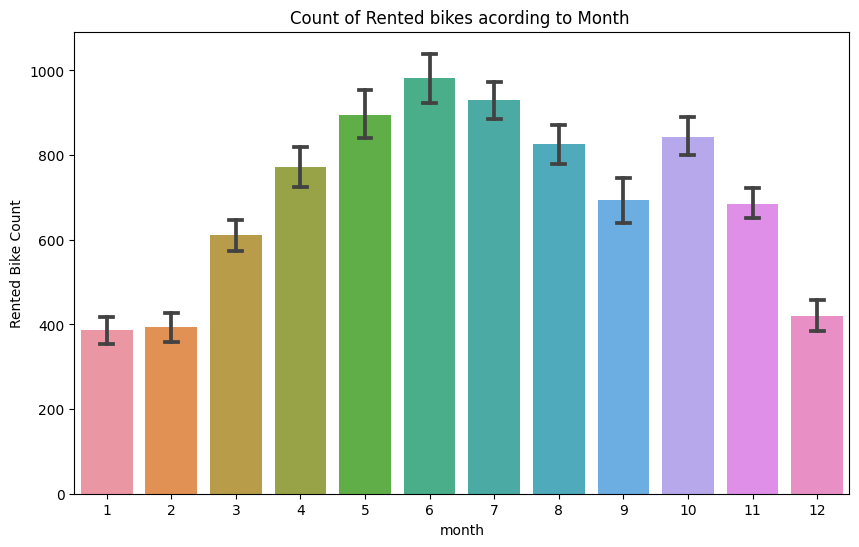

In [37]:
fig,ax=plt.subplots(figsize=(10,6))
sns.barplot(data=df1,x='month',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Month ')

[Text(0.5, 1.0, 'The Count of Rented bikes acording to weekdays and weekend ')]

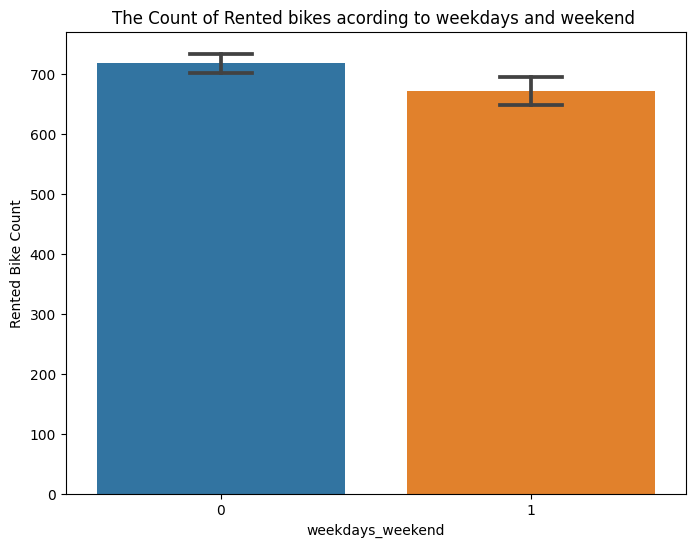

In [38]:
fig,ax=plt.subplots(figsize=(8,6))
sns.barplot(data=df1,x='weekdays_weekend',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='The Count of Rented bikes acording to weekdays and weekend ')

[Text(0.5, 1.0, ' The Count of Rented bikes acording to hour in weekdays and weekend')]

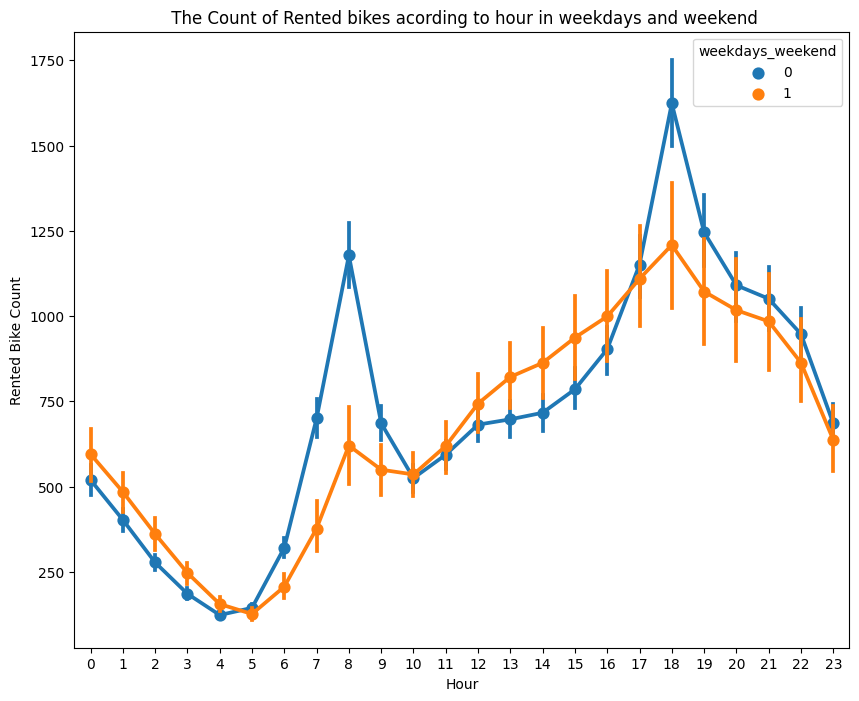

In [39]:
fig,ax=plt.subplots(figsize=(10,8))
sns.pointplot(data=df1,x='Hour',y='Rented Bike Count',hue='weekdays_weekend',ax=ax)
ax.set(title=' The Count of Rented bikes acording to hour in weekdays and weekend')

[Text(0.5, 1.0, 'Count of Rented bikes acording to Hour ')]

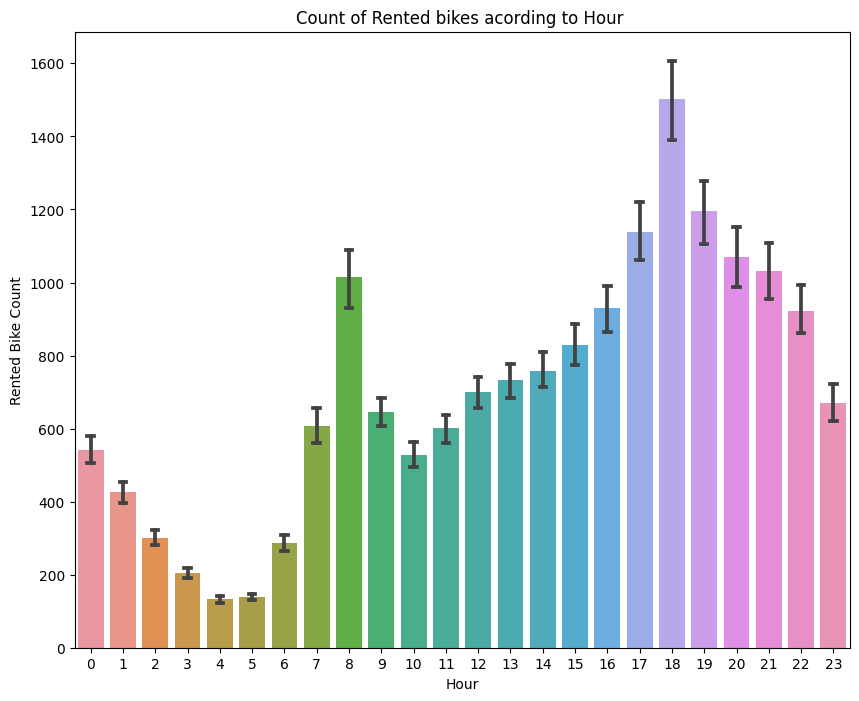

In [40]:
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df1,x='Hour',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Hour ')

[Text(0.5, 1.0, 'The Count of Rented bikes acording to Functioning Day ')]

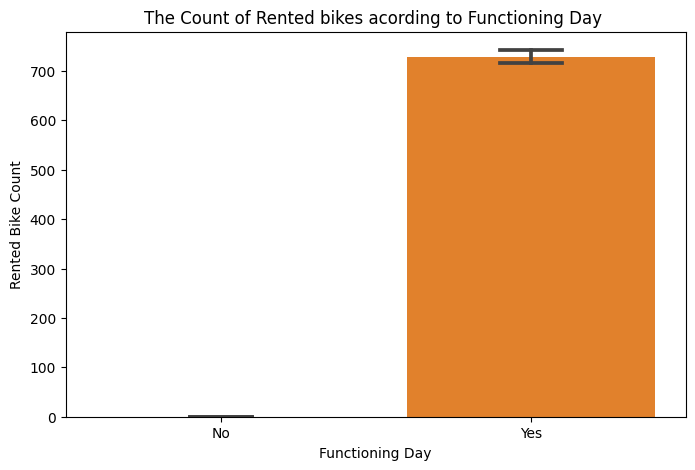

In [41]:
fig,ax=plt.subplots(figsize=(8,5))
sns.barplot(data=df1,x='Functioning Day',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='The Count of Rented bikes acording to Functioning Day ')

[Text(0.5, 1.0, 'The Count of Rented bikes acording to hour from Functioning Day ')]

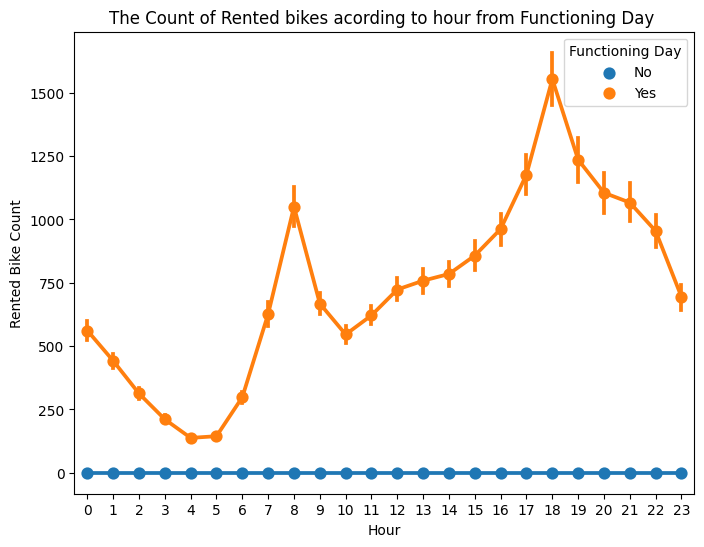

In [42]:
fig,ax=plt.subplots(figsize=(8,6))
sns.pointplot(data=df1,x='Hour',y='Rented Bike Count',hue='Functioning Day',ax=ax)
ax.set(title='The Count of Rented bikes acording to hour from Functioning Day ')

[Text(0.5, 1.0, 'Ths Count of Rented bikes acording to Holiday ')]

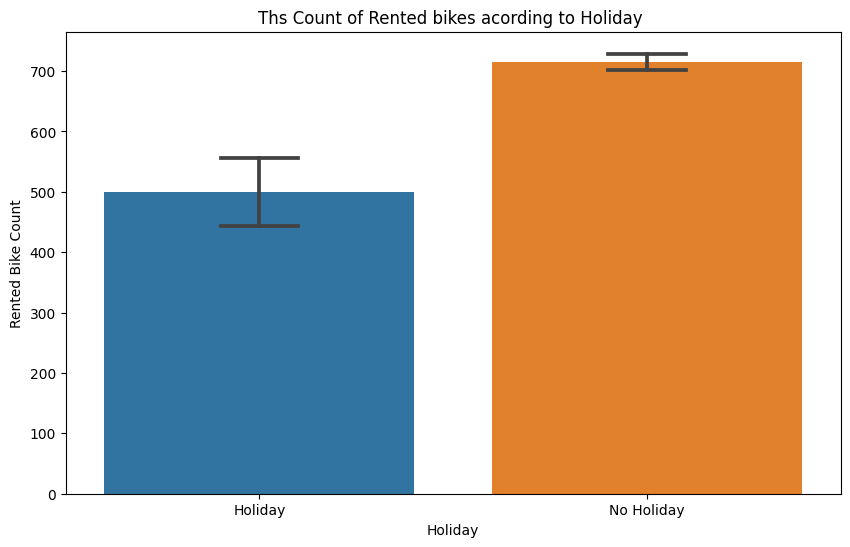

In [43]:
fig,ax=plt.subplots(figsize=(10,6))
sns.barplot(data=df1,x='Holiday',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='Ths Count of Rented bikes acording to Holiday ')

[Text(0.5, 1.0, 'The Count of Rented bikes acording to hour from Holiday ')]

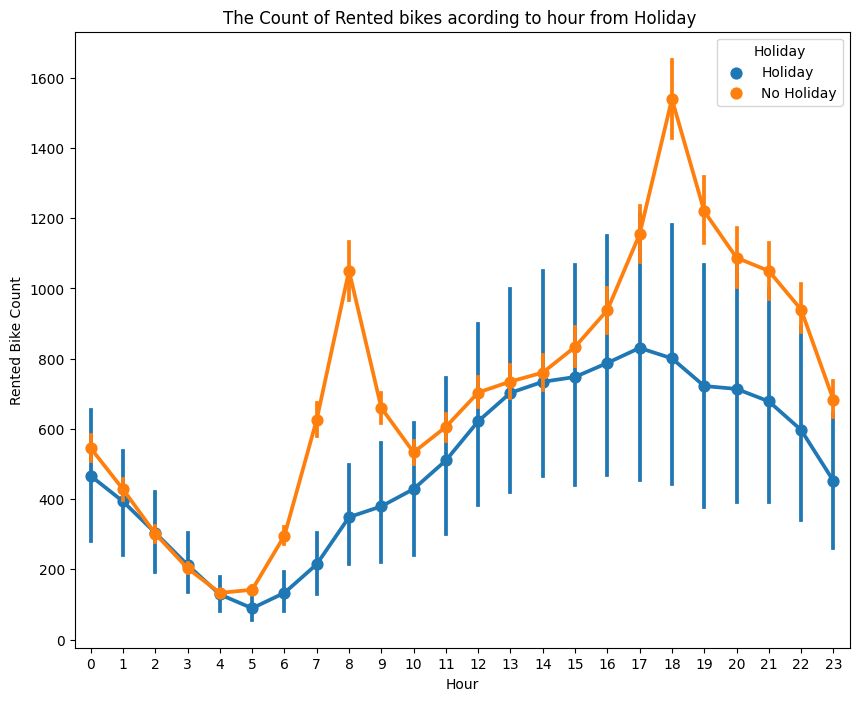

In [44]:
fig,ax=plt.subplots(figsize=(10,8))
sns.pointplot(data=df1,x='Hour',y='Rented Bike Count',hue='Holiday',ax=ax)
ax.set(title='The Count of Rented bikes acording to hour from Holiday ')

Text(0.5, 1.0, 'holiday and non holiday are')

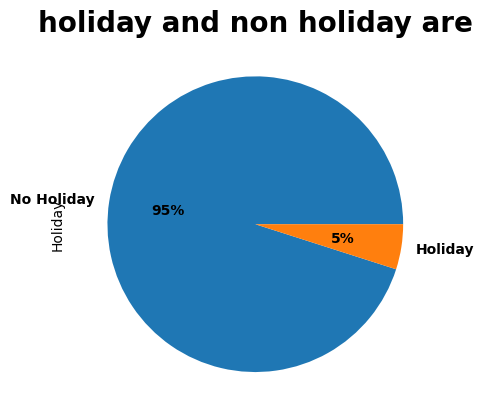

In [45]:
plt.subplot(1,1,1)
holiday = df1.Holiday.value_counts()
holiday.plot.pie(autopct='%1.0f%%',textprops={'weight': 'bold'})
plt.title('holiday and non holiday are',fontweight="bold", size=20)

[Text(0.5, 1.0, 'The Count of Rented bikes acording to Seasons ')]

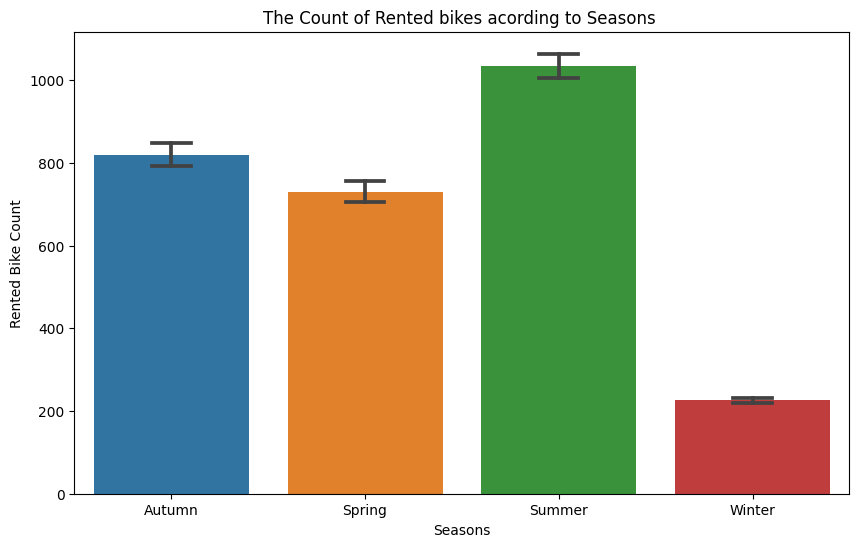

In [46]:
fig,ax=plt.subplots(figsize=(10,6))
sns.barplot(data=df1,x='Seasons',y='Rented Bike Count',ax=ax,capsize=.2)
ax.set(title='The Count of Rented bikes acording to Seasons ')

[Text(0.5, 1.0, ' The Count of Rented bikes acording to hour to seasons ')]

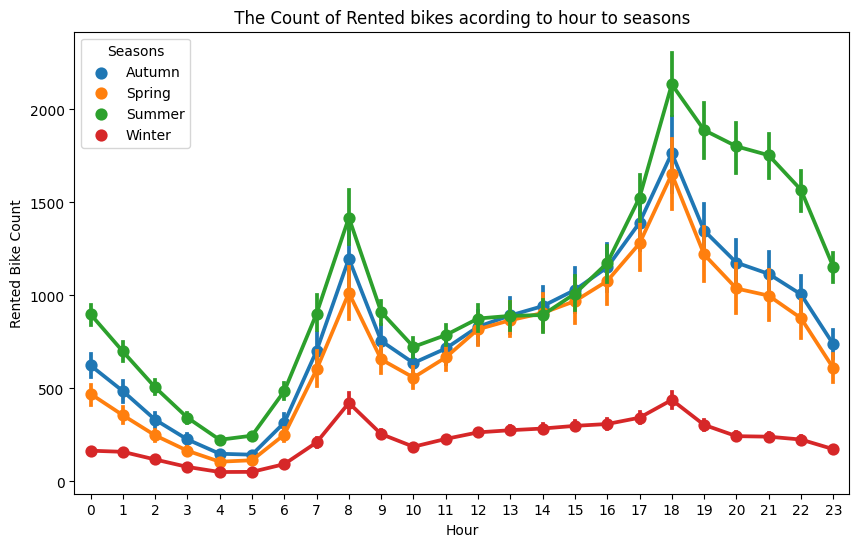

In [47]:
fig,ax=plt.subplots(figsize=(10,6))
sns.pointplot(data=df1,x='Hour',y='Rented Bike Count',hue='Seasons',ax=ax)
ax.set(title=' The Count of Rented bikes acording to hour to seasons ')

In [48]:
numerical_columns=list(df1.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

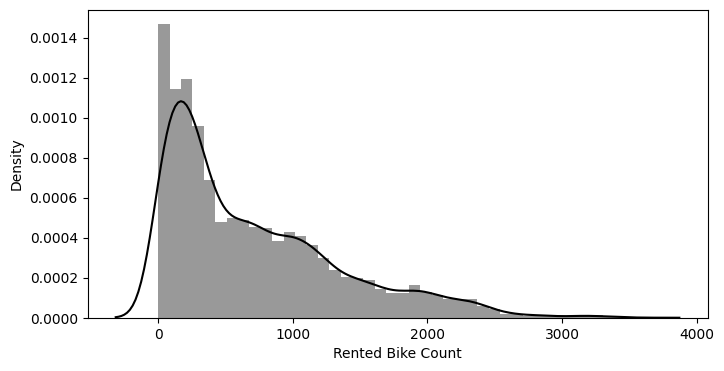

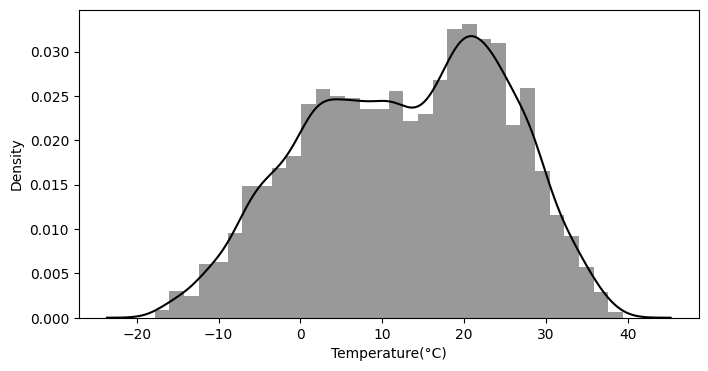

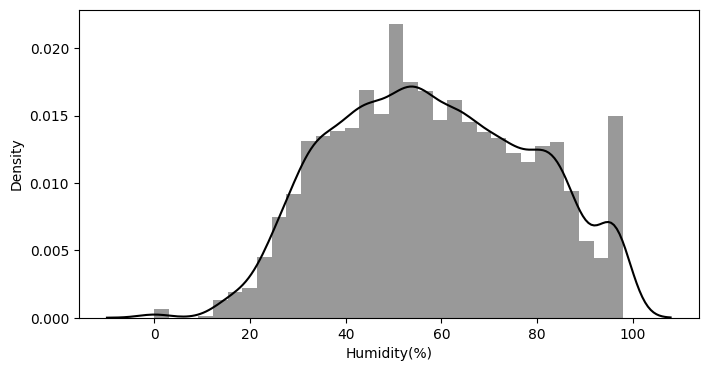

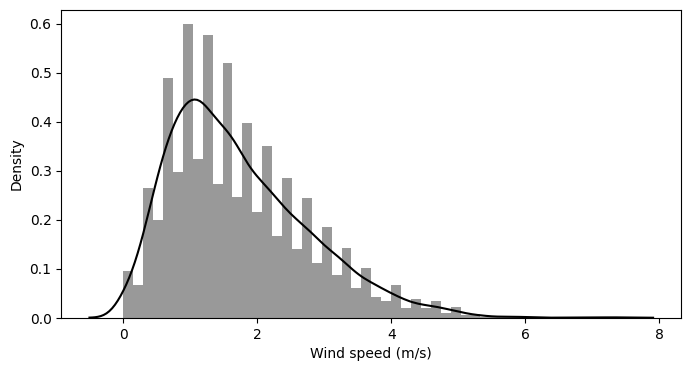

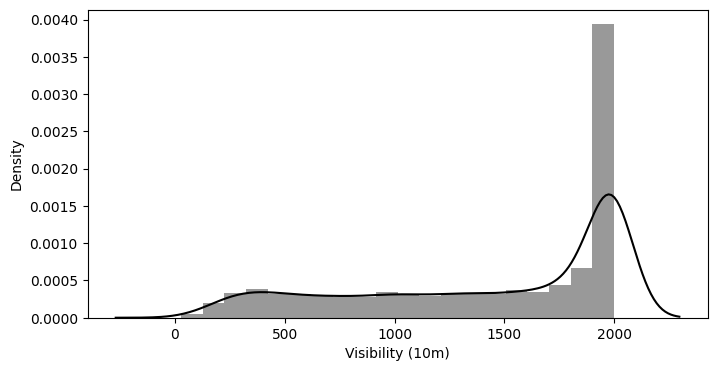

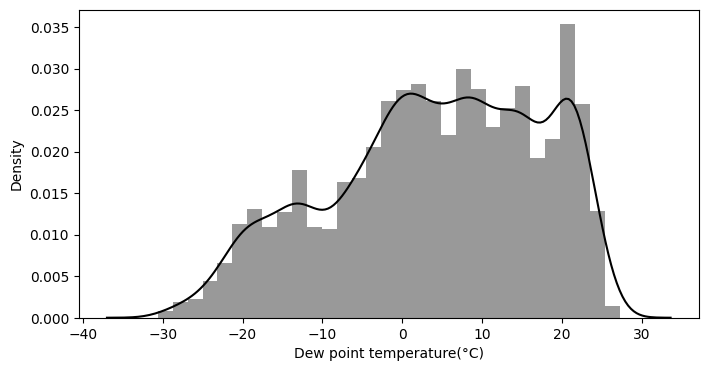

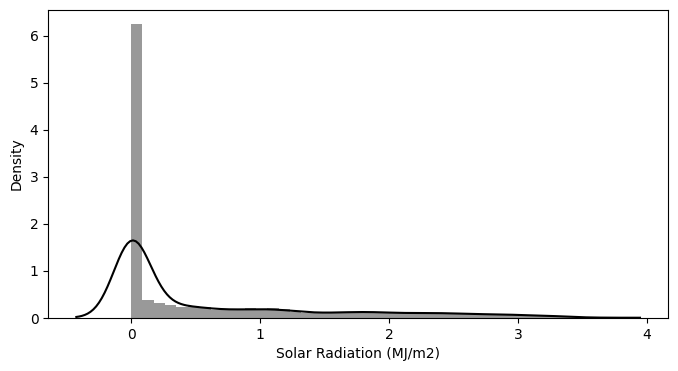

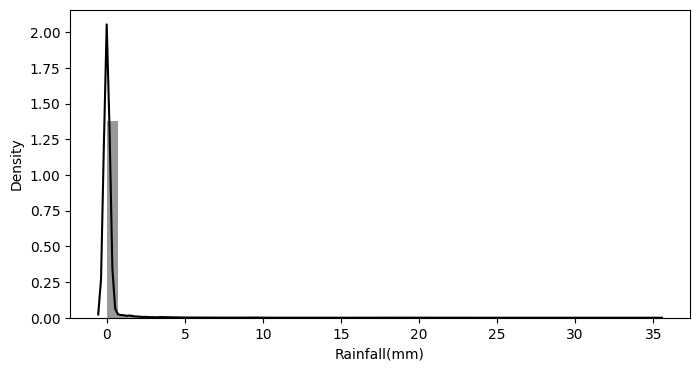

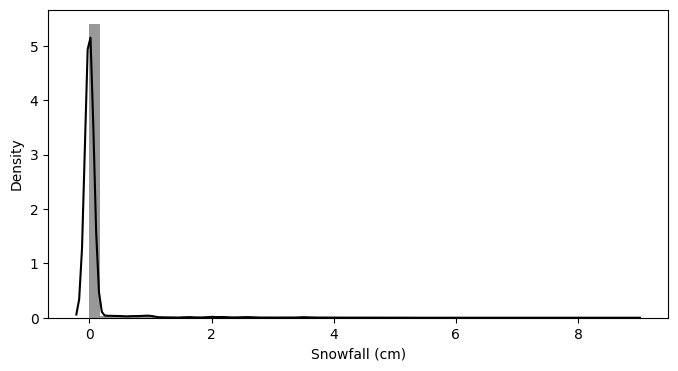

In [49]:
for col in numerical_features:
  plt.figure(figsize=(8,4))
  sns.distplot(x=df1[col],color="black")
  plt.xlabel(col)
plt.show()

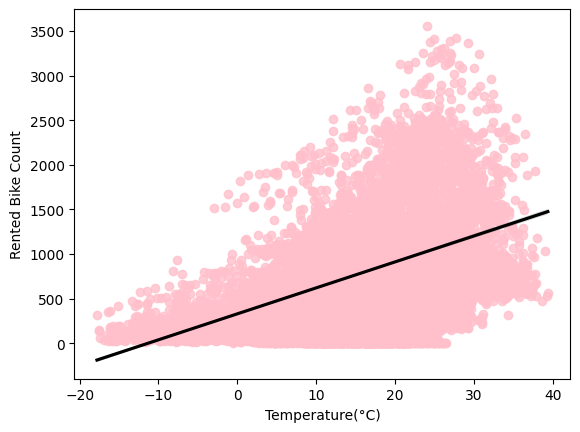

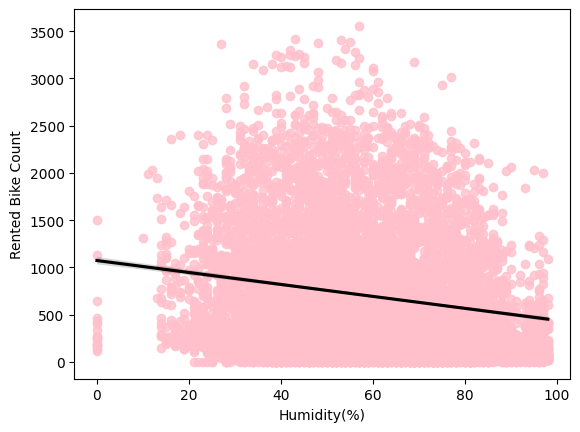

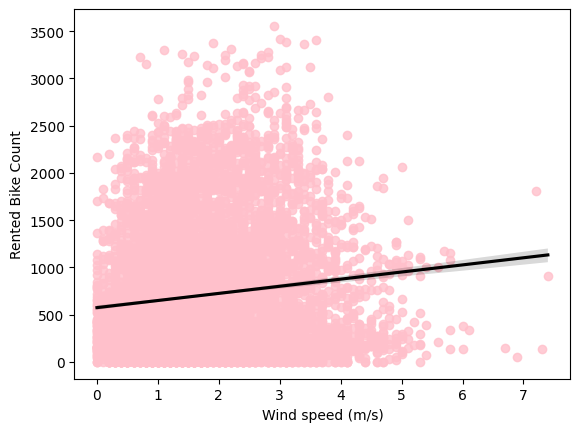

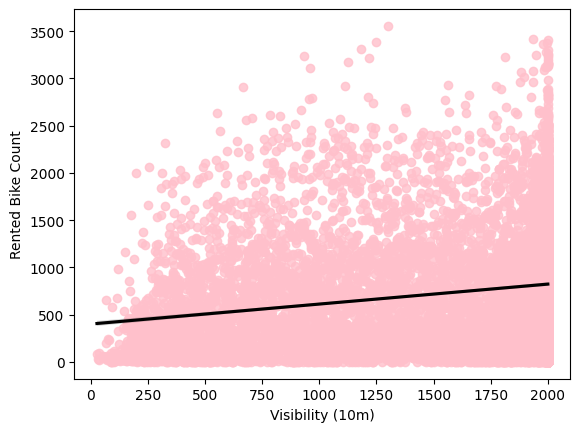

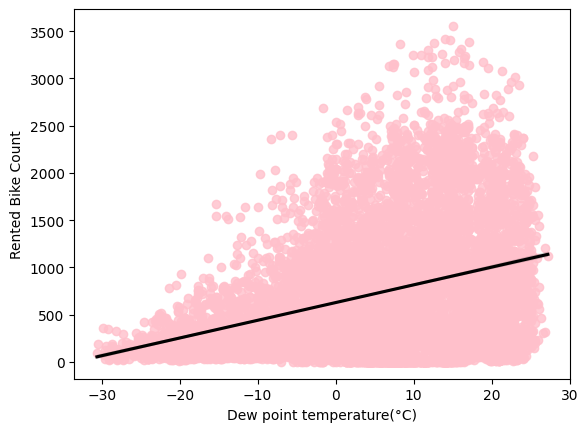

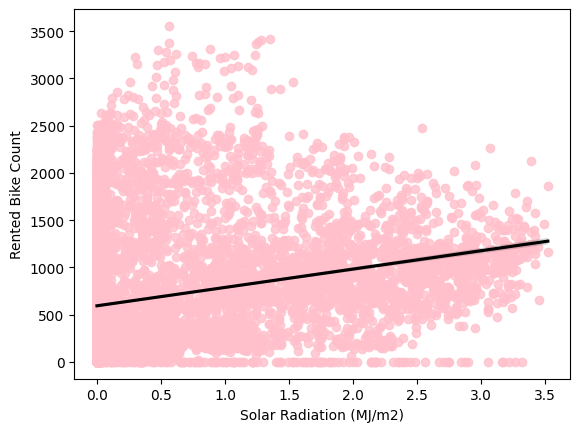

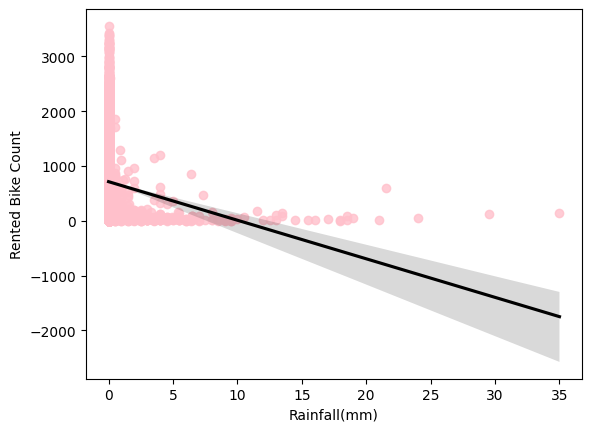

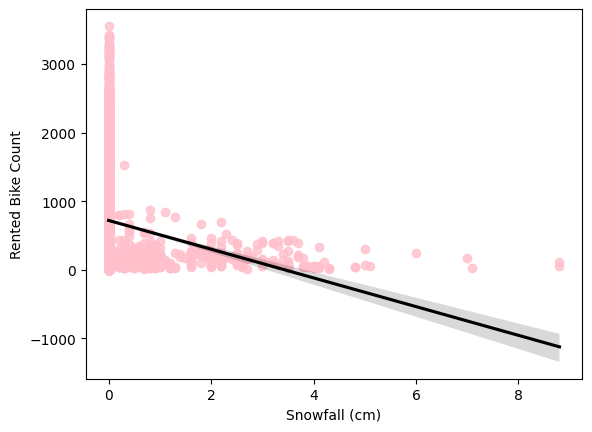

In [50]:
for col in  numerical_columns [:9]:
  if col == 'Rented Bike Count':
    pass
  else:
    sns.regplot(x=df[col],scatter_kws={'color':'pink'},y=df1["Rented Bike Count"],line_kws={"color": "black"})
  
  plt.show()

In [51]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) 
   for i in range(X.shape[1])]
 
   return(vif)

In [52]:
calc_vif(df1[[i for i in df.describe().columns 
      if i not in ['Rented Bike Count','Dew point temperature(°C)'] ]])


,variables,VIF
0,Hour,3.921832
1,Temperature(°C),3.228318
2,Humidity(%),4.868221
3,Wind speed (m/s),4.608625
4,Visibility (10m),4.710170
5,Solar Radiation (MJ/m2),2.246791
6,Rainfall(mm),1.079158
7,Snowfall (cm),1.120579


In [53]:
df1.corr()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Temperature(°C),0.538558,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),0.121108,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),0.199280,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(°C),0.379788,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),0.261837,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.123074,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),-0.141804,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


##**Checking Corelation between dependent and independent variable.**

<Axes: >

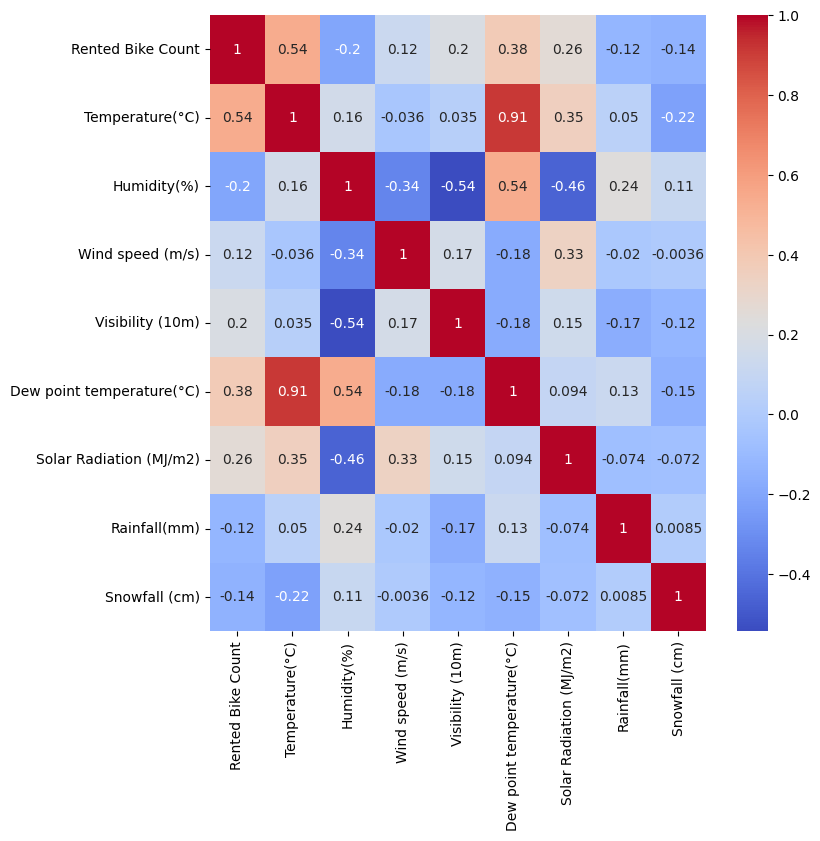

In [54]:
#checking correlation with the help of heatmap
corr_mat=df1.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr_mat,cmap='coolwarm',annot=True)

##**Checking of Correlation between variables Checking in OLS Model**:

#####**OLS (Ordinary Least Squares) is a statistical method commonly used in machine learning and other fields to fit a linear regression model to a dataset.**
#####**It also give the relationship between one or more independent variables and a dependent variable**.


In [55]:
import statsmodels.api as sm
X = df1[[ 'Temperature(°C)','Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)','Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']]
Y = df1['Rented Bike Count']
df1.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0


In [56]:
X = sm.add_constant(X)
X

,const,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,1.0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,1.0,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,1.0,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,1.0,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,1.0,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
8755,1.0,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0
8756,1.0,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0
8757,1.0,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0
8758,1.0,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0


In [57]:
model = sm.OLS(Y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     723.1
Date:                Tue, 02 May 2023   Prob (F-statistic):               0.00
Time:                        15:11:13   Log-Likelihood:                -66877.
No. Observations:                8760   AIC:                         1.338e+05
Df Residuals:                    8751   BIC:                         1.338e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [58]:
X.corr()

,const,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature(°C),NaN,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),NaN,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),NaN,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),NaN,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(°C),NaN,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),NaN,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),NaN,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),NaN,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


X.corr() is a useful method in machine learning for understanding the relationships between variables in a dataset. By computing the correlation matrix, you can identify variables that are highly correlated with each other, which can help in feature selection and model building.

<Axes: >

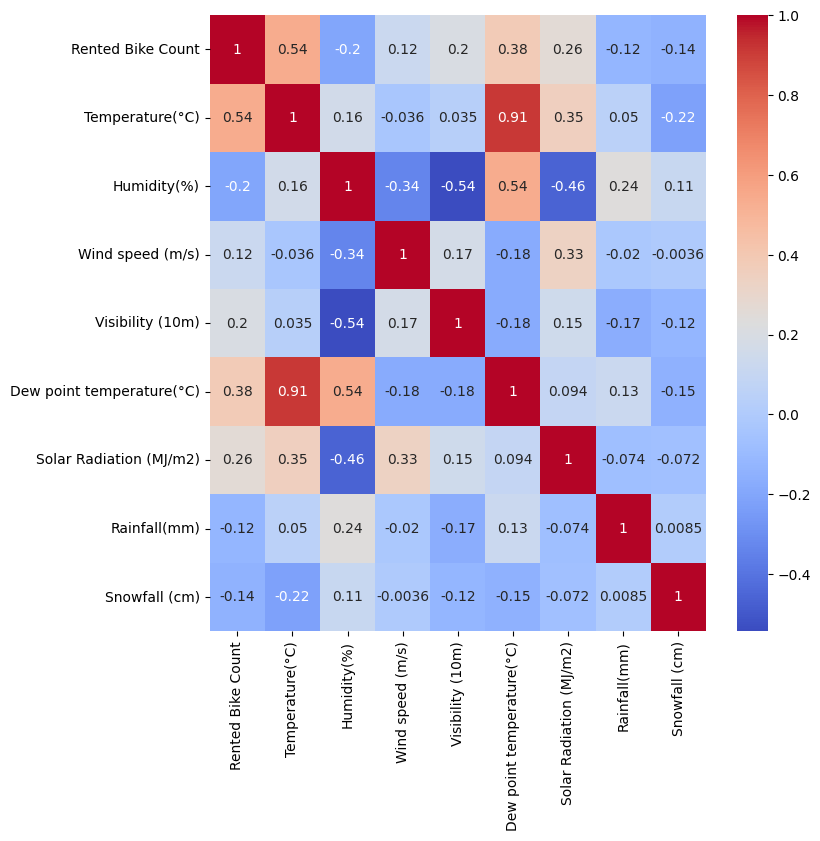

In [59]:
#checking correlation with the help of heatmap
corr_mat=df1.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr_mat,cmap='coolwarm',annot=True)

**correlation between columns 'Temperature' and 'Dew point temperature' i.e 0.91 so even if we drop this column then it dont affects the outcome of our analysis. And they have the same variations.. so we can drop the column 'Dew point temperature(°C)'**.


In [60]:
#drop the Dew point temperature column
df1.drop(['Dew point temperature(°C)'],axis=1)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,0
8756,764,20,3.4,37,2.3,2000,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,0
8757,694,21,2.6,39,0.3,1968,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,0
8758,712,22,2.1,41,1.0,1859,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,0


##**Create the dummy variables**



#####**A dataset may contain various type of values, sometimes it consists of categorical values. So, in-order to use those categorical value for programming efficiently we create dummy variables**.

In [61]:
categorical_features=list(df1.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['Hour', 'Seasons', 'Holiday', 'Functioning Day', 'month',
       'weekdays_weekend'],
      dtype='object')

In [62]:
# encoding the season names

df1['Winter'] = np.where(df1['Seasons']=='Winter', 1, 0)
df1['Spring'] = np.where(df1['Seasons']=='Spring', 1, 0)
df1['Summer'] = np.where(df1['Seasons']=='Summer', 1, 0)
df1['Autumn'] = np.where(df1['Seasons']=='Autumn', 1, 0)

df1.drop(columns=['Seasons'],axis=1,inplace=True)

In [63]:
df1['Holiday'] = np.where(df1['Holiday']=='Holiday', 1, 0)
df1['Functioning Day'] = np.where(df1['Functioning Day']=='Functioning Day', 1, 0)
df1['month'] = np.where(df1['month']=='month', 1, 0)
df1['Hour'] = np.where(df1['Hour']=='Hour', 1, 0)
df1['weekdays_weekend'] = np.where(df1['weekdays_weekend']=='weekdays_weekend', 1, 0)




In [64]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Holiday                    8760 non-null   int64  
 11  Functioning Day            8760 non-null   int64  
 12  month                      8760 non-null   int64  
 13  weekdays_weekend           8760 non-null   int64

#**Function** :

In [324]:
from sklearn.model_selection import train_test_split
train_data , test_data=train_test_split(df1,test_size=0.2)


print("Training data:")
print(train_data.head())

# Show the first few rows of the testing data
print("Testing data:")
print(test_data.head())

Training data:
      Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
1300                 24     0            -15.4           30               2.5   
4137                912     0             19.3           62               0.8   
3656                555     0             17.5           94               0.9   
5904                953     0             30.0           61               1.7   
2402                171     0              4.7           78               1.5   

      Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
1300              2000                      -29.1                     0.00   
4137              1894                       11.8                     1.14   
3656               203                       16.5                     0.06   
5904              1794                       21.6                     0.00   
2402               466                        1.1                     0.00   

      Rainfall(mm)  Snowfall 

##Creating Function to train linear models and calculate scores

In [325]:
#creating list of matrix to store the evaluation matrix of all model
mean_sq_error=[]
root_mean_sq_error=[]
r2_list=[]
adj_r2_list=[]

In [326]:
# making a function to train and evaluate linear model
def train_linear_model (model,X_train,y_train,X_test,y_test):

#training the model
  model.fit(X_train,y_train)

  #predicting the values
  pred = model.predict(X_test)
  import math
  from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

  print('\n================Evalution Matrix=========================\n')

  #finding mean_squared_error
  MSE  = mean_squared_error(y_test**2,pred**2)
  print("MSE :" , MSE)

  #finding root mean squared error
  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  #finding the r2 score
  r2 = r2_score(y_test**2,pred**2)
  print("R2 :" ,r2)
  #finding the adjusted r2 score
  adj_r2=1-(1-r2_score(y_test**2,pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2 : ",adj_r2)
  
  print('\n================Evalution Matrix=========================\n')
  

#appending metrice to list
  mean_sq_error.append(MSE)
  root_mean_sq_error.append(RMSE)
  r2_list.append(r2)
  adj_r2_list.append(adj_r2)
    
  # ploting the line graph of actual and predicted values
  print('\
  =========================================================\
  Evalution Graph\
  ===================================================\n')  
  plt.figure(figsize=(20,10))
  plt.plot((pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.show()

##**Models**:

In [327]:
# importing the libraries 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [328]:
# Creating the data of independent variables
Y = df1['Rented Bike Count']

# Create the dependent variable data
X = df1.drop(columns=['Rented Bike Count'],axis=1).values

In [329]:
X

array([[ 0. , -5.2, 37. , ...,  0. ,  0. ,  0. ],
       [ 0. , -5.5, 38. , ...,  0. ,  0. ,  0. ],
       [ 0. , -6. , 39. , ...,  0. ,  0. ,  0. ],
       ...,
       [ 0. ,  2.6, 39. , ...,  0. ,  0. ,  1. ],
       [ 0. ,  2.1, 41. , ...,  0. ,  0. ,  1. ],
       [ 0. ,  1.9, 43. , ...,  0. ,  0. ,  1. ]])

In [330]:
# Splitting the dataset into the Training set and Testing set

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [331]:
# Transforming data

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##**Linear regression model**

In [332]:
linear_model= LinearRegression()

In [333]:
reg= LinearRegression().fit(X_train,Y_train)


In [334]:
#checking the score 
reg.score(X_train,Y_train)


0.41476547672900543

In [335]:
#check the coefficeint
reg.coef_

array([ 0.00000000e+00,  1.57764092e+03, -1.20909133e+03,  4.75202859e+02,
       -2.63550423e+01,  3.62411960e+02, -4.07314990e+02, -1.67929452e+03,
        4.82515642e+02, -1.59679110e+02,  5.76994468e+13,  3.31101072e+12,
       -1.80677830e+12, -4.64676902e+16, -4.64676902e+16, -4.64676902e+16,
       -4.64676902e+16])

In [336]:
#get the X_train and X-test value
Y_pred_train=reg.predict(X_train)
Y_pred_test=reg.predict(X_test)

In [337]:
MSE_lr= mean_squared_error((Y_train), (Y_pred_train))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)

#calculate MAE
MAE_lr= mean_absolute_error(Y_train,Y_pred_train)
print("MAE :",MAE_lr)

#calculate r2 and adjusted r2
r2_linear_test = r2_score(Y_test,Y_pred_test)
print("R2 :" ,r2_linear_test)
print("Adjusted R2 : ",1-(1-r2_score(Y_test,Y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))



MSE : 243014.55122716894
RMSE : 492.9650608584435
MAE : 361.82548515981733
R2 : 0.397309788230791
Adjusted R2 :  0.39140106066442626


In [338]:
train_dict={'Model':"Linear Regression",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2':round(R2,4),
              'Adjusted R2':round(adj_r2,4)}

In [339]:
traing_results_df=pd.DataFrame(train_dict,index=[1])
traing_results_df

,Model,MAE,MSE,RMSE,R2,Adjusted R2
1,Linear Regression,362.2731,245392.0997,495.3707,0.4098,0.5962


##**Lasso Regression**

In [340]:
from sklearn.linear_model import Lasso
lasso_model = Lasso()

In [341]:
#importing lasso 
from sklearn.linear_model import Lasso
L1 = Lasso(alpha=0.001, max_iter=1000)
L1.fit(X_train,Y_train)
L1.score(X_train,Y_train)

0.415431844297965

In [342]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y ,test_size=0.2, random_state=42)

# Creating Lasso object
lasso_reg = Lasso(alpha=0.1)

# Fitting Lasso regression on training data
lasso_reg.fit(X_train, Y_train)

# Predicting on test data
Y_pred = lasso_reg.predict(X_test)

# Computing metrics
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

# Computing adjusted R2
n = len(Y_test)
p = X_test.shape[1]
adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)

# Printing results
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)
print("Adjusted R2:", adj_r2)

MSE: 240958.2546903604
RMSE: 490.87498886209346
MAE: 361.3754015669623
R2: 0.4216718336024454
Adjusted R2: 0.4160019496181556


In [343]:
L1.coef_


array([    0.        ,  1596.07554662, -1184.71561934,   456.31842125,
         -30.33015963,   261.04636788,  -403.59790842, -1677.19538875,
         459.22922062,  -152.63164052,     0.        ,     0.        ,
           0.        ,  -179.56967516,   -18.27667309,   -45.40786815,
          44.05418274])

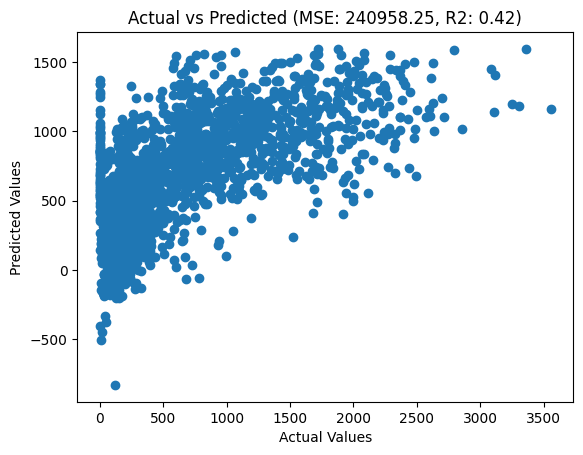

In [344]:
plt.scatter(Y_test, Y_pred) 
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Actual vs Predicted (MSE: {mse:.2f}, R2: {r2:.2f})")
plt.show()

In [345]:
train_dict={'Model':"Lasso Regression",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2':round(R2,4),
              'Adjusted R2':round(adj_r2,4)}

In [346]:
traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df

,Model,MAE,MSE,RMSE,R2,Adjusted R2
0,Linear Regression,362.2731,245392.0997,495.3707,0.4098,0.5962
1,Lasso Regression,362.2731,245392.0997,495.3707,0.4098,0.4160


##**Ridge Regression**


In [347]:
from sklearn.linear_model import Ridge
ridge = Ridge()

In [348]:
from sklearn.linear_model import Ridge

# Creating Ridge object
ridge_reg = Ridge(alpha=0.1)

# Fitting Ridge regression on training data
ridge_reg.fit(X_train, Y_train)

# Scoring the model on test data
score = ridge_reg.score(X_test, Y_test)

# Printing results
print("Ridge Regression Score:", score)

Ridge Regression Score: 0.42164823149210895


In [349]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Creating Ridge object
ridge_reg = Ridge(alpha=0.1)

# Fitting Ridge regression on training data
ridge_reg.fit(X_train, Y_train)

# Predicting on test data
Y_pred = ridge_reg.predict(X_test)

# Computing metrics
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

# Computing adjusted R2
n = len(Y_test)
p = X_test.shape[1]
adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)

# Printing results
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)
print("Adjusted R2:", adj_r2)

MSE: 240968.08842083407
RMSE: 490.8850052923129
MAE: 361.40009429373924
R2: 0.42164823149210895
Adjusted R2: 0.4159781161145806


In [350]:
ridge_reg.coef_

array([ 0.00000000e+00,  3.14762195e+01, -1.13414312e+01,  6.16118263e+01,
       -1.78480243e-02,  9.66669722e-01, -1.21762480e+02, -5.15639101e+01,
        5.33778040e+01, -1.56869991e+02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -1.27071676e+02,  2.84258275e+01, -4.30052964e+00,
        1.02946378e+02])

In [351]:
train_dict={'Model':"Ridge Regression",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2':round(R2,4),
              'Adjusted R2':round(adj_r2,4)}

In [352]:
traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df

,Model,MAE,MSE,RMSE,R2,Adjusted R2
0,Linear Regression,362.2731,245392.0997,495.3707,0.4098,0.5962
1,Lasso Regression,362.2731,245392.0997,495.3707,0.4098,0.4160
2,Ridge Regression,362.2731,245392.0997,495.3707,0.4098,0.4160


##**ElasticNet Regression**

In [353]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()


In [354]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Fitting Elastic Net regression on training data
elastic_net.fit(X_train, Y_train)

# Scoring the model on test data
score = elastic_net.score(X_test, Y_test)

# Printing results
print("Elastic Net Regression Score:", score)

Elastic Net Regression Score: 0.42118133717579964


In [355]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Creating Elastic Net object
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Fitting Elastic Net regression on training data
elastic_net.fit(X_train, Y_train)

# Predicting on test data
Y_pred = elastic_net.predict(X_test)

# Computing metrics
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

# Computing adjusted R2
n = len(Y_test)
p = X_test.shape[1]
adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)

# Printing results
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)
print("Adjusted R2:", adj_r2)

MSE: 241162.6181811318
RMSE: 491.0831072039964
MAE: 360.02649124900955
R2: 0.42118133717579964
Adjusted R2: 0.4155066444030133


In [356]:
elastic_net.coef_

array([ 0.00000000e+00,  3.04293047e+01, -1.12922940e+01,  5.46644353e+01,
       -9.44262951e-03,  3.00314942e+00, -1.05889846e+02, -4.90202270e+01,
        3.90471876e+01, -7.86941307e+01,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -8.64076529e+01,  2.41455674e+01, -1.96840734e+01,
        8.19461594e+01])

In [357]:
train_dict={'Model':"ElasticNet Regression",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2':round(R2,4),
              'Adjusted R2':round(adj_r2,4)}

In [358]:
traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df

,Model,MAE,MSE,RMSE,R2,Adjusted R2
0,Linear Regression,362.2731,245392.0997,495.3707,0.4098,0.5962
1,Lasso Regression,362.2731,245392.0997,495.3707,0.4098,0.4160
2,Ridge Regression,362.2731,245392.0997,495.3707,0.4098,0.4160
3,ElasticNet Regression,362.2731,245392.0997,495.3707,0.4098,0.4155


##**Polynomial Regression**

In [359]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2)

# Transforming features to polynomial features
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Creating Linear Regression object
poly_reg = LinearRegression()

# Fitting polynomial regression on training data
poly_reg.fit(X_train_poly, Y_train)

# Scoring the model on test data
score = poly_reg.score(X_test_poly, Y_test)

# Printing results
print("Score:", score)

Score: 0.5253915211601976


In [360]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)

# Transforming features to polynomial features
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Creating Linear Regression object
poly_reg = LinearRegression()

# Fitting polynomial regression on training data
poly_reg.fit(X_train_poly, Y_train)

# Predicting on test data
Y_pred = poly_reg.predict(X_test_poly)

# Computing metrics
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

# Computing adjusted R2
n = len(Y_test)
p = X_test.shape[1]
adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)

# Printing results
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)
print("Adjusted R2:", adj_r2)

MSE: 197743.8370931283
RMSE: 444.683974405564
MAE: 311.7971505325841
R2: 0.5253915211601976
Adjusted R2: 0.5207384968578466


In [361]:
poly_reg.coef_


array([ 5.40600449e-07,  3.21565502e+09,  7.96876537e+06, -1.49039633e+06,
        4.05288812e+06,  1.52853443e+06, -2.39470989e+05, -2.87732453e+05,
        5.51983786e+05,  2.38927158e+05, -1.22416946e+06, -1.29627187e+05,
       -2.34160051e+04,  2.17244654e+06, -4.46552363e+05, -3.73993631e+05,
       -1.17341678e+06,  2.04480173e+05, -4.17000379e+05, -1.63410343e+06,
       -1.67334175e+06,  3.03101771e+05, -1.02345800e+06,  1.23412665e+05,
        1.27284338e+04, -1.49494314e+04,  3.62714712e+05,  4.85690873e+04,
       -2.13931281e+05, -9.90003279e+04, -3.07101129e+05,  3.26716715e+05,
        6.96050050e+04,  3.36511528e+03, -1.77395589e+04, -8.36829230e-01,
       -1.82171048e+00, -9.42979956e+00,  2.87775211e-02,  6.38419085e+00,
        1.96913008e+01, -2.57152561e+02,  1.52080971e+01, -1.67797295e+01,
        8.42140519e+02, -1.11212031e+03, -2.46769306e+02, -7.96860031e+06,
       -7.96863106e+06, -7.96880975e+06, -7.96864717e+06, -1.84628787e-01,
       -8.09278183e+00,  

In [362]:
train_dict={'Model':"Polynomial Regression",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2':round(R2,4),
              'Adjusted R2':round(adj_r2,4)}

In [363]:
traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df

,Model,MAE,MSE,RMSE,R2,Adjusted R2
0,Linear Regression,362.2731,245392.0997,495.3707,0.4098,0.5962
1,Lasso Regression,362.2731,245392.0997,495.3707,0.4098,0.4160
2,Ridge Regression,362.2731,245392.0997,495.3707,0.4098,0.4160
3,ElasticNet Regression,362.2731,245392.0997,495.3707,0.4098,0.4155
4,Polynomial Regression,362.2731,245392.0997,495.3707,0.4098,0.5207


##**Decision tree Regression model**

In [364]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Creating Decision Tree Regressor object
tree_reg = DecisionTreeRegressor(random_state=42)

# Creating Pipeline object
pipe = Pipeline(steps=[('tree_reg', tree_reg)])

# Creating GridSearchCV object
params = {'tree_reg__max_depth': [2, 3, 4, 5]}
grid = GridSearchCV(pipe, params, cv=5)

# Fitting GridSearchCV on data
grid.fit(X, Y)

# Getting best parameters and best score
best_params = grid.best_params_
best_score = grid.best_score_

# Printing best parameters and best score
print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score:.2f}")

Best Parameters: {'tree_reg__max_depth': 5}
Best Score: 0.05


In [365]:
# Creating Decision Tree Regressor object
tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)

# Fitting Decision Tree Regressor on training data
tree_reg.fit(X_train, Y_train)

# Predicting on test data
Y_pred = tree_reg.predict(X_test)

# Computing metrics
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

# Computing adjusted R-squared
n = len(X_test)
p = X_test.shape[1]
adj_r2 = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

# Computing RMSE
rmse = np.sqrt(mse)

# Printing metrics

print(f"MSE: {MSE:.2f}")
print(f"MAE: {MAE:.2f}")
print(f"R2: {R2:.2f}")
print(f"Adjusted R2: {adj_r2:.2f}")
print(f"RMSE: {RMSE:.2f}")




MSE: 245392.10
MAE: 362.27
R2: 0.41
Adjusted R2: 0.48
RMSE: 495.37


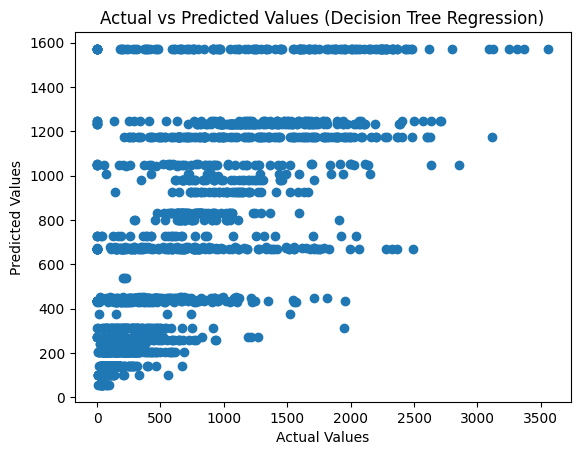

In [366]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Decision Tree Regression)")
plt.show()

In [367]:
train_dict={'Model':"Decision tree Regression",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2':round(R2,4),
              'Adjusted R2':round(adj_r2,4)}

In [368]:
traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df

,Model,MAE,MSE,RMSE,R2,Adjusted R2
0,Linear Regression,362.2731,245392.0997,495.3707,0.4098,0.5962
1,Lasso Regression,362.2731,245392.0997,495.3707,0.4098,0.4160
2,Ridge Regression,362.2731,245392.0997,495.3707,0.4098,0.4160
3,ElasticNet Regression,362.2731,245392.0997,495.3707,0.4098,0.4155
4,Polynomial Regression,362.2731,245392.0997,495.3707,0.4098,0.5207
5,Decision tree Regression,362.2731,245392.0997,495.3707,0.4098,0.4816


##**KNN Regression model**

In [369]:
#importing Knn 
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_jobs=-1)


In [370]:
# Calculating performance metrics
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
adj_r2 = 1 - (1 - r2) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1))

# Printing performance metrics
print("MSE:", MSE)
print("RMSE:", RMSE)
print("MAE:", MAE)
print("R2 score:", R2)
print("Adjusted R2 score:", adj_r2)


MSE: 245392.09965141362
RMSE: 495.37066894540055
MAE: 362.27309365896457
R2 score: 0.4098400767211391
Adjusted R2 score: 0.481646463437729


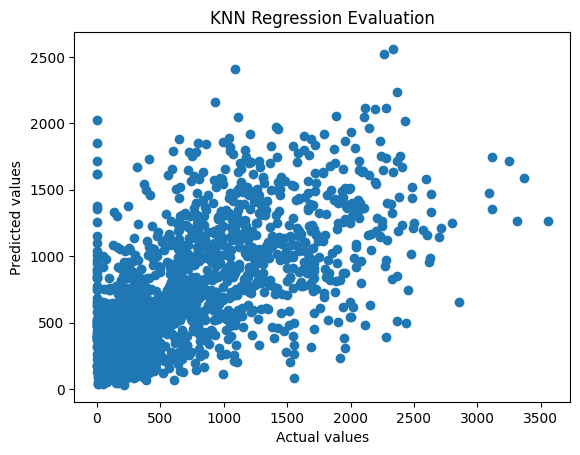

In [371]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, Y_train)

# make predictions on the testing set
Y_pred = knn.predict(X_test)

# create a scatter plot of the predicted values against the actual values
plt.scatter(Y_test, Y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('KNN Regression Evaluation')
plt.show()

In [372]:
train_dict={'Model':"KNN Regression",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2':round(R2,4),
              'Adjusted R2':round(adj_r2,4)}

In [373]:
traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df

,Model,MAE,MSE,RMSE,R2,Adjusted R2
0,Linear Regression,362.2731,245392.0997,495.3707,0.4098,0.5962
1,Lasso Regression,362.2731,245392.0997,495.3707,0.4098,0.4160
2,Ridge Regression,362.2731,245392.0997,495.3707,0.4098,0.4160
3,ElasticNet Regression,362.2731,245392.0997,495.3707,0.4098,0.4155
4,Polynomial Regression,362.2731,245392.0997,495.3707,0.4098,0.5207
5,Decision tree Regression,362.2731,245392.0997,495.3707,0.4098,0.4816
6,KNN Regression,362.2731,245392.0997,495.3707,0.4098,0.4816


##**Random Forest**

In [374]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()

In [375]:
# train your random forest regression model
rf = RandomForestRegressor()
rf.fit(X_train, Y_train)

# make predictions on the testing set
Y_pred = rf.predict(X_test)

# calculate the evaluation metrics
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
rmse = np.sqrt(mse)

print("MSE:", MSE)
print("MAE:", MAE)
print("R2:", R2)
print("Adjusted R2:", adjusted_r2)
print("RMSE:",RMSE )



MSE: 245392.09965141362
MAE: 362.27309365896457
R2: 0.4098400767211391
Adjusted R2: 0.6371088862305644
RMSE: 495.37066894540055


In [376]:
train_dict={'Model':"Random Forest",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2':round(R2,4),
              'Adjusted R2':round(adjusted_r2,4)}

In [377]:
traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df

,Model,MAE,MSE,RMSE,R2,Adjusted R2
0,Linear Regression,362.2731,245392.0997,495.3707,0.4098,0.5962
1,Lasso Regression,362.2731,245392.0997,495.3707,0.4098,0.4160
2,Ridge Regression,362.2731,245392.0997,495.3707,0.4098,0.4160
3,ElasticNet Regression,362.2731,245392.0997,495.3707,0.4098,0.4155
4,Polynomial Regression,362.2731,245392.0997,495.3707,0.4098,0.5207
5,Decision tree Regression,362.2731,245392.0997,495.3707,0.4098,0.4816
6,KNN Regression,362.2731,245392.0997,495.3707,0.4098,0.4816
7,Random Forest,362.2731,245392.0997,495.3707,0.4098,0.6371


##**Gradient Boosting**

In [378]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model=GradientBoostingRegressor()

In [379]:
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=0)
gb.fit(X, Y)

# Make predictions
Y_pred = gb.predict(X)

# Compute evaluation metrics
mse = mean_squared_error(Y, Y_pred)
mae = mean_absolute_error(Y, Y_pred)
r2 = r2_score(Y, Y_pred)
n = len(Y)
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - X.shape[1] - 1)
rmse = np.sqrt(mse)

print("MSE: ", MSE)
print("MAE: ", MAE)
print("R2: ", R2)
print("Adjusted R2: ", adj_r2)
print("RMSE: ", RMSE)

MSE:  245392.09965141362
MAE:  362.27309365896457
R2:  0.4098400767211391
Adjusted R2:  0.6132947332035517
RMSE:  495.37066894540055


In [380]:
train_dict={'Model':"Gradient Boosting Regression",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2':round(R2,4),
              'Adjusted R2':round(adj_r2,4)}

In [381]:
traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df

,Model,MAE,MSE,RMSE,R2,Adjusted R2
0,Linear Regression,362.2731,245392.0997,495.3707,0.4098,0.5962
1,Lasso Regression,362.2731,245392.0997,495.3707,0.4098,0.4160
2,Ridge Regression,362.2731,245392.0997,495.3707,0.4098,0.4160
3,ElasticNet Regression,362.2731,245392.0997,495.3707,0.4098,0.4155
4,Polynomial Regression,362.2731,245392.0997,495.3707,0.4098,0.5207
5,Decision tree Regression,362.2731,245392.0997,495.3707,0.4098,0.4816
6,KNN Regression,362.2731,245392.0997,495.3707,0.4098,0.4816
7,Random Forest,362.2731,245392.0997,495.3707,0.4098,0.6371
8,Gradient Boosting Regression,362.2731,245392.0997,495.3707,0.4098,0.6133


##**eXtreme Gradient Boosting Regression**

In [382]:
import xgboost as xgb
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Creating XGBoost model

xgb_model = xgb.XGBRegressor()

# Fitting the model on the training set

xgb_model.fit(X_train, Y_train)

# Predicting on the test set

Y_pred = xgb_model.predict(X_test)

# Calculating evaluation metrics

mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
adj_r2 = 1 - (1 - r2) * (len(Y_test) - 1) / (len(Y_test) - X_test.shape[1] - 1)
rmse = np.sqrt(mse)

# Printing the evaluation metrics

print('MSE:',MSE )
print('MAE:', MAE)
print('R2 Score:', R2)
print('Adjusted R2 Score:', adj_r2)
print('RMSE:', RMSE)

MSE: 245392.09965141362
MAE: 362.27309365896457
R2 Score: 0.4098400767211391
Adjusted R2 Score: 0.5961579302203405
RMSE: 495.37066894540055


In [383]:
train_dict={'Model':"eXtreme Gradient Boosting Regression",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2':round(R2,4),
              'Adjusted R2':round(adj_r2,4)}

In [384]:
traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df

,Model,MAE,MSE,RMSE,R2,Adjusted R2
0,Linear Regression,362.2731,245392.0997,495.3707,0.4098,0.5962
1,Lasso Regression,362.2731,245392.0997,495.3707,0.4098,0.4160
2,Ridge Regression,362.2731,245392.0997,495.3707,0.4098,0.4160
3,ElasticNet Regression,362.2731,245392.0997,495.3707,0.4098,0.4155
4,Polynomial Regression,362.2731,245392.0997,495.3707,0.4098,0.5207
5,Decision tree Regression,362.2731,245392.0997,495.3707,0.4098,0.4816
6,KNN Regression,362.2731,245392.0997,495.3707,0.4098,0.4816
7,Random Forest,362.2731,245392.0997,495.3707,0.4098,0.6371
8,Gradient Boosting Regression,362.2731,245392.0997,495.3707,0.4098,0.6133
9,eXtreme Gradient Boosting Regression,362.2731,245392.0997,495.3707,0.4098,0.5962


##**LightGBM**

In [385]:
import lightgbm as lgb

lgbr=lgb.LGBMRegressor()

In [386]:
model = lgb.LGBMRegressor()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

# Calculate the evaluation metrics
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
n = len(X_test)
p = X_test.shape[1]
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
rmse = np.sqrt(mse)

# Print the evaluation metrics
print("MSE:" ,MSE)
print("MAE:" ,MAE)
print("R2:" ,R2)
print("Adjusted R2:" ,adj_r2)
print("RMSE:" ,RMSE)

MSE: 245392.09965141362
MAE: 362.27309365896457
R2: 0.4098400767211391
Adjusted R2: 0.6314834187110491
RMSE: 495.37066894540055


In [387]:
train_dict={'Model':"LightGBM",
             'MAE':round(MAE,4),
             'MSE':round(MSE,4),
             'RMSE':round(RMSE,4),
             'R2':round(R2,4),
              'Adjusted R2':round(adj_r2,4)}

##**Final training result of all models**

In [388]:
traing_results_df=traing_results_df.append(train_dict,ignore_index=True)
traing_results_df

,Model,MAE,MSE,RMSE,R2,Adjusted R2
0,Linear Regression,362.2731,245392.0997,495.3707,0.4098,0.5962
1,Lasso Regression,362.2731,245392.0997,495.3707,0.4098,0.4160
2,Ridge Regression,362.2731,245392.0997,495.3707,0.4098,0.4160
3,ElasticNet Regression,362.2731,245392.0997,495.3707,0.4098,0.4155
4,Polynomial Regression,362.2731,245392.0997,495.3707,0.4098,0.5207
5,Decision tree Regression,362.2731,245392.0997,495.3707,0.4098,0.4816
6,KNN Regression,362.2731,245392.0997,495.3707,0.4098,0.4816
7,Random Forest,362.2731,245392.0997,495.3707,0.4098,0.6371
8,Gradient Boosting Regression,362.2731,245392.0997,495.3707,0.4098,0.6133
9,eXtreme Gradient Boosting Regression,362.2731,245392.0997,495.3707,0.4098,0.5962


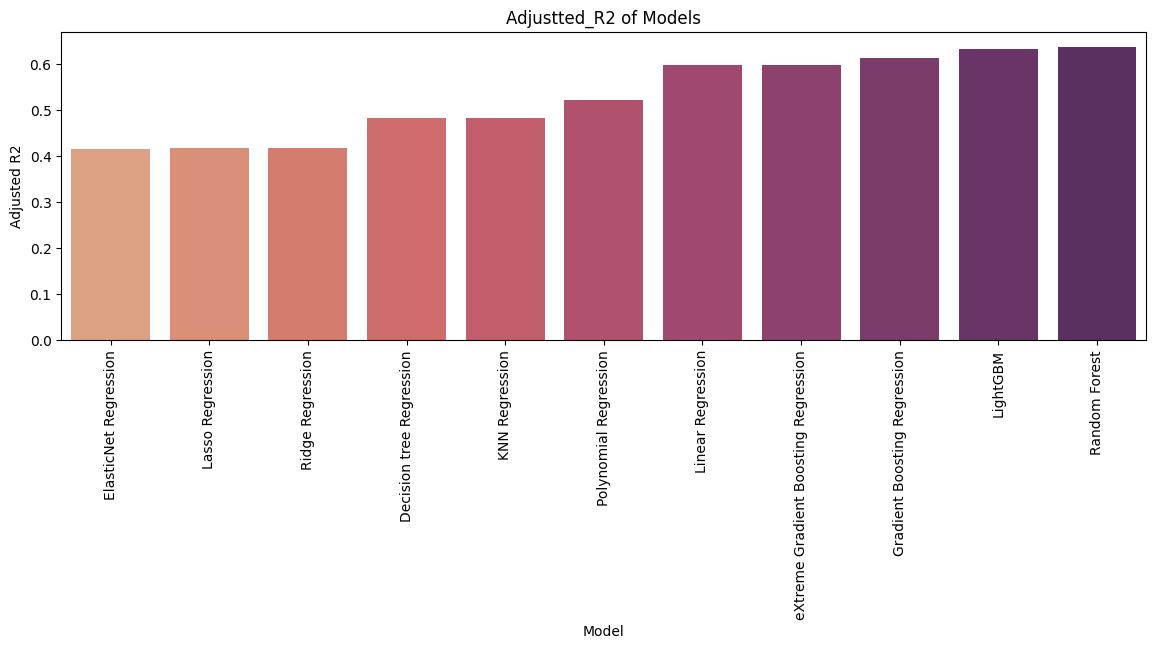

In [401]:
plt.figure(figsize=(14,4),dpi=100)
sns.barplot(x='Model',y='Adjusted R2',data=traing_results_df.sort_values('Adjusted R2'),palette="flare").set(title='Adjustted_R2 of Models')
plt.xticks(rotation=90);

#**Conclusion**